<img style="float: left;" src="input/dadess_logo.svg" width=300>

# Anàlisi de les noves xarxes agroecològiques en resposta al COVID-19

Arran de la pandèmia del COVID-19 serveis com la restauració, mercats, etc. van tancar posant en un moment d'urgència a projectes agrícoles, ramaders i artesanals que necessitaven una sortida ràpida del seu producte. La resposta d'aquests projectes va ser obrir la seva venta habilitant la possibilitat de comandes (per telèfon, on-line, etc.), enviaments a certes localitzacions i deixant la seva informació disponible (mètodes de pagament, productes, botiga, etc.).

A continuació mostrarem l'ànalisis fet sobre les dades dels projectes que han sorgit així com la comparació amb les dades dels productors adherits a la venda de proximitat de la Generalitat de Catalunya.

La informació dels nous projectes s'ha recollit en diferents iniciatives d'ESS obertes. En aquest anàlisi utilitzem les dades disponibles a:
- [Arran de terra](https://www.arrandeterra.org/) i [Pam a Pam](https://pamapam.org/ca/): [Abastiment agroecològic](http://arrandeterra.org/abastiment/)
- [Unió de Pagesos](https://uniopagesos.cat/): [Pagesia a casa](https://pagesiaacasa.cat/)
- [Productors venda de proximitat](https://analisi.transparenciacatalunya.cat/Comer-/Productors-adherits-a-la-venda-de-proximitat/xmyy-7xqi)

L'ànalisi que es mostra es divideix en les següents seccions principals:
- [Comparació de les dades dels nous projectes amb les de venda de proximitat per comarca](#Comparació-per-comarques-dels-nous-projectes-respecte-als-de-venda-de-proximitat). Es mostren mapes amb [percentatges](#Percentatge) i [números totals](#Ambdues-dades-representades-en-el-mateix-mapa-per-comarca) per així poder comparar on han sorgit més projectes, de quin tipus de productes...
- Informació de nous projectes: 
    * [Informació extra d'interès](##Nous-projectes): Com que aquests tenen alguna informació extra, s'utilitzen el mateix tipus de mapa que en la secció anterior per mostrar-la per comarca. 
    * [Relacions logístiques entre comarques](#Connexions-logístiques): Es mostra un altre tipus de diagrames per analitzar l'activitat logística de les diferents comarques.
- [Comparació entre els nous projectes](#Comparació-entre-els-diferents-projectes-nous): S'utilitzen representacions de barres per comparar els nous projectes: si tenen productes principals (carn, verdura, fruita) o no, de quin tipus de pagament disposen... En aquest cas també es separen els dos orígens utilitzats (Arran de terra i Unió de Pagesos) ja que les dades recollides per cada un d'ells és lleugerament diferent i aporta més informació a comparar.

In [1]:
import plot_utils as pu
import preprocess as prep

In [2]:
execute = prep.check_output_files()
if execute == 'y':
    !python get_data_ready.py

It looks like you have all the necessary files for the analysis.
Do you want to execute the process anyway and update them? (y = yes, n = no): n


## Llegint les dades

In [3]:
data_covid, data_gen, com_coord, conf, cat = prep.read_final_data()

A continuació es mostra un resum de què contenen les dades ja pre-processades:

In [4]:
print('Dades dels nous '+str(data_covid.shape[0])+' projectes:')
data_covid.head()

Dades dels nous 576 projectes:


MARCA  \
0                        PITEUS   
1                   Molí de Rué   
2        La Cabana d'Alcover SL   
3  PARC DE LES OLORS DEL SERRAT   
4          COLLITA DE L'AVI PIÀ   

                                               DONDE  dataset  \
0  Alt Camp, Alt Empordà, Alt Penedès, Alt Urgell...  pagesos   
1  Alt Camp, Alt Empordà, Alt Penedès, Alt Urgell...  pagesos   
2  Alt Camp, Alt Empordà, Alt Penedès, Alt Urgell...  pagesos   
3  Alt Camp, Alt Empordà, Alt Penedès, Alt Urgell...  pagesos   
4  Alt Camp, Alt Empordà, Alt Penedès, Alt Urgell...  pagesos   

    comarca_origin                                   PAGO_prep  vegetables  \
0   Baix Llobregat        efectiu transferencia previa targeta         0.0   
1    Ribera D'Ebre  efectiu bizum transferencia previa targeta         0.0   
2          Noguera                efectiu transferencia previa         0.0   
3  Vallès Oriental                        transferencia previa         1.0   
4         Alt Camp  efectiu bizum transferencia previa targeta         1.0   

   fruit  meat  flowers  legumes  ...  card+trans  trans+bizum  n_main_prod  \
0    0.0   0.0      0.0        0  ...           1                       0.0   
1    0.0   0.0      0.0        0  ...           1            1          0.0   
2    0.0   0.0      0.0        0  ...                                   0.0   
3    0.0   0.0      0.0        0  ...                                   1.0   
4    0.0   0.0      0.0        0  ...           1            1          1.0   

   n_other_prod  n_tot_prod  n_paym_methods  n_comarcas_delivery  \
0           1.0         1.0               3                   42   
1           2.0         2.0               4                   42   
2           1.0         1.0               2                   42   
3           1.0         2.0               1                   42   
4           1.0         2.0               4                   42   

           Comarca  Provincia               marca_vdp  
0   Baix Llobregat  Barcelona                          
1    Ribera D'Ebre  Tarragona                          
2          Noguera     Lleida  LA CABANA D'ALCOVER,SL  
3  Vallès Oriental  Barcelona                          
4         Alt Camp  Tarragona                          

[5 rows x 49 columns]

In [5]:
print('Dades de venda de proximitat amb '+str(data_gen.shape[0])+' projectes:')
data_gen.head()

Dades de venda de proximitat amb 2256 projectes:


Nom productor Núm. acreditació Persona jurídica  \
0                          A. TORRES S.C.P.   VP/P/2693/2017                X   
1                   A.R. SOLDEVILA, S.C.P..   VP/P/0512/2013                X   
2                      ABEL MULLERAS, JORDI   VP/P/0868/2013                    
3                      ABELLI DALMAU, JAUME   VP/P/0867/2013                    
4  ACTEL, SCCL.AGRUP.COOP.AGR.TERRES LLEIDA  VP/AP/0031/2013                X   

  Persona física        NIF                              Adreça  Codi postal  \
0                 J43991181                           C MAJOR 1        43424   
1                 J60727948               Lloc Fontdeconangla 0         8573   
2              X                                                       17240   
3              X                                                       17251   
4                 F25023938  CTRA. VALL D'ARAN, KM. 3 (ACTEL 2)        25196   

     Municipi           Comarca  \
0      SARRAL  CONCA DE BARBERÀ   
1        ORÍS             OSONA   
2  LLAGOSTERA           GIRONÈS   
3     CALONGE      BAIX EMPORDÀ   
4    ALFARRÀS            SEGRIÀ   

                                           Productes  ... others iseco  \
0  Carn, embotits i derivats carnis de cabrum, Ca...  ...      0     0   
1                        BLAT TOU, PATATA, CARABASSA  ...      0     0   
2                                                Mel  ...      0     0   
3  ORDI, CIVADA, PATATA, OLIVES, RAÏM VI, PRESSEC...  ...      0     0   
4                                                     ...      0     0   

  is_horta is_fruita is_cereals is_ramaderia is_elaboracio  n_main_prod  \
0        0         0          1            1             1            1   
1        1         0          1            0             0            1   
2        0         0          0            0             1            0   
3        1         1          0            0             1            2   
4        0         0          0            0             0            0   

   n_other_prod  n_tot_prod  
0             3           4  
1             1           2  
2             1           1  
3             3           5  
4             0           0  

[5 rows x 46 columns]

In [6]:
#not in Venta de Proximitat
data_new = data_covid[data_covid.marca_vdp == '']
print('Han sorgit ' + str(data_new.shape[0]) + ' projectes nous com a resposta a la situació del COVID \
no presents en les dades de venda de proximitat.')

Han sorgit 553 projectes nous com a resposta a la situació del COVID no presents en les dades de venda de proximitat.


In [7]:
aux_text = {'total':'en total',
            'n_abastiment':'abastiment',
            'n_pagesos':'pagesos',
            'vegetables':'de verdures',
           'fruit':'de fruita',
           'meat':'de carn',
           'iseco':'ecos',
           'n_comarcas_delivery':'comarques amb enviament'}
aux_text_red = {'total':'en total',
            'vegetables':'de verdures',
           'fruit':'de fruita',
           'meat':'de carn'}



In [8]:
by_comarca_gen   = pu.dataset_to_plot(data_gen,data_gen,
                                   com_coord,multiple_origins=False)
by_comarca_covid = pu.dataset_to_plot(data_covid,data_gen,
                                   com_coord,multiple_origins=True)
by_comarca_covid_new = pu.dataset_to_plot(data_new,data_gen,
                                          com_coord,multiple_origins=True)

## Comparació per comarques dels nous projectes respecte als de venda de proximitat

En aquesta secció es mostren mapes de Catalunya amb la delimitació de les diferents comarques. Es comparen diferents aspectes de les dades entre comarques.

### Percentatges

Prenent com a base les dades de projectes adherits a la venda de proximitat, es calcula el percentatge per comarca de nous projectes apareguts com a resposta a la crisi del COVID-19.

En el cas de la Vall d'Aran apareix un augment del 100% perquè hi ha un projecte a venda de proximitat i n'apareix un de nou. A part d'aquesta comarca, Es pot veure com a <b>la Segarra, la Conca del Barberà i el Priorat</b> han tigut un augment en projectes agroalimentaris de <b>més del 50%</b>.

Map saved to: output/Nous_projectes_per_comarca_degut_a_la_crisi_del_COVID-19.pdf



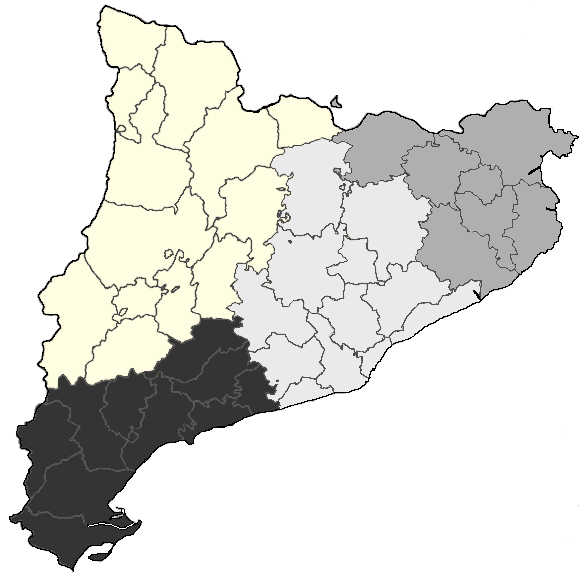

In [9]:
title_name = 'Nous projectes per comarca degut a la crisi del COVID-19'
fig = pu.plot_map_comarca_points(by_comarca_covid_new,cat,'pctge_new','text','nous',title_name,save=True)
#fig.write_image("noves_altes_comarca_mapa.png")
#fig.write_image("noves_altes_comarca_mapa.pdf")
fig.show()

#### Percentatge per sector

Map saved to: output/SECTOR_horta__Nous_projectes_per_comarca_degut_a_la_crisi_del_Covid-19.pdf



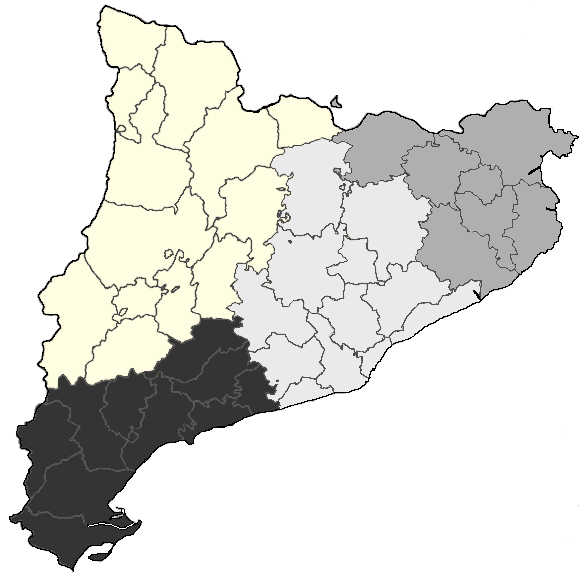

Map saved to: output/SECTOR_fruita__Nous_projectes_per_comarca_degut_a_la_crisi_del_Covid-19.pdf



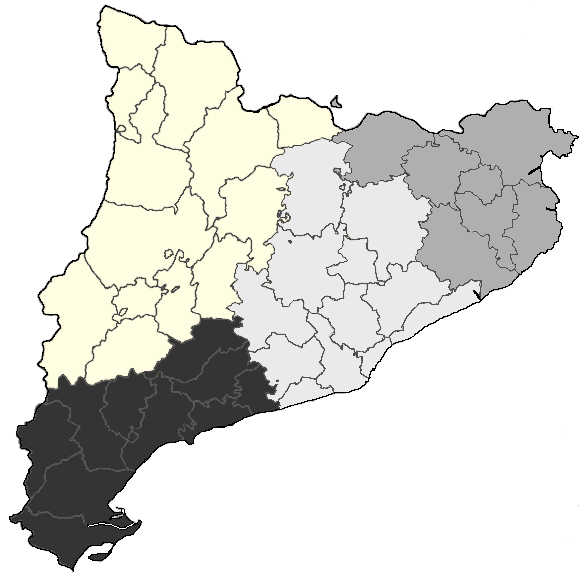

Map saved to: output/SECTOR_cereals__Nous_projectes_per_comarca_degut_a_la_crisi_del_Covid-19.pdf



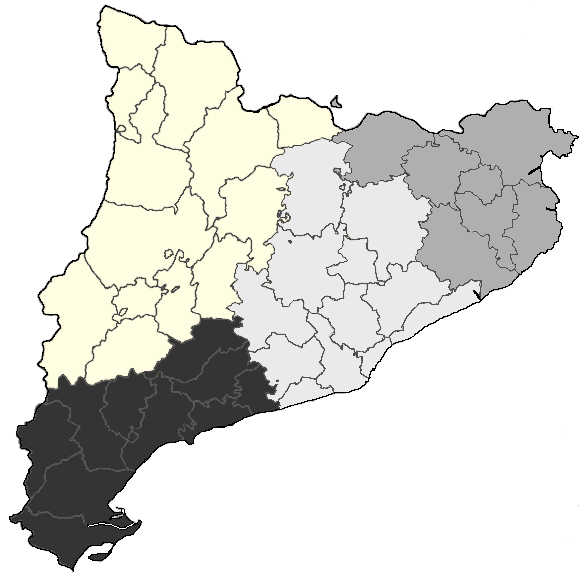

Map saved to: output/SECTOR_ramaderia__Nous_projectes_per_comarca_degut_a_la_crisi_del_Covid-19.pdf



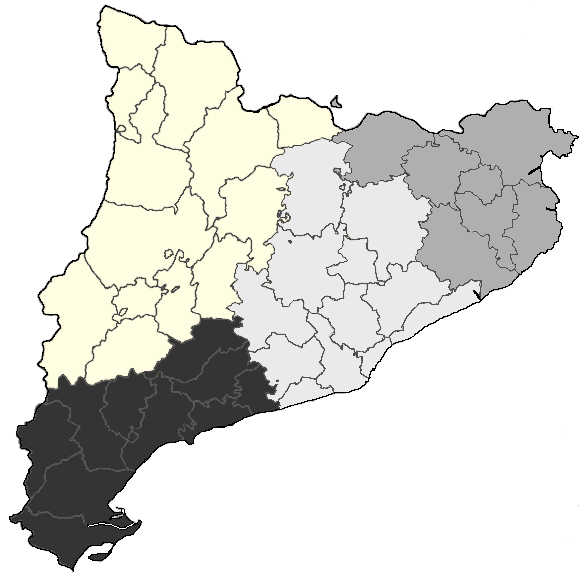

Map saved to: output/SECTOR_elaboracio__Nous_projectes_per_comarca_degut_a_la_crisi_del_Covid-19.pdf



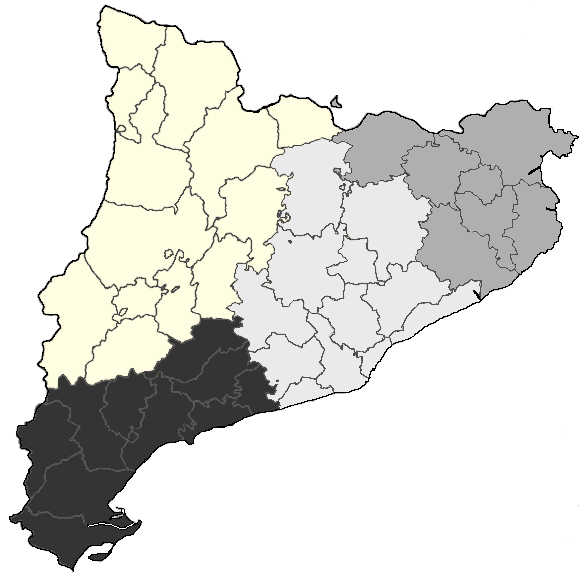

In [10]:
for sector in conf['sectors'].keys():

    #only producers of the specific sector
    data_covid_sect = data_new[data_new['is_'+sector]==1]
    data_gen_sect   = data_gen[data_gen['is_'+sector]==1]

    by_comarca_sect = pu.dataset_to_plot(data_covid_sect,data_gen_sect,
                                 com_coord,multiple_origins=True)

    title_name = 'SECTOR '+sector+': Nous projectes per comarca degut a la crisi del Covid-19'
    fig = pu.plot_map_comarca_points(by_comarca_sect,cat,'pctge_new','text','nous',title_name,save=True)
    #fig.write_image("noves_altes_comarca_mapa_"+sector+".png")
    fig.show()


### Ambdues dades representades en el mateix mapa per comarca


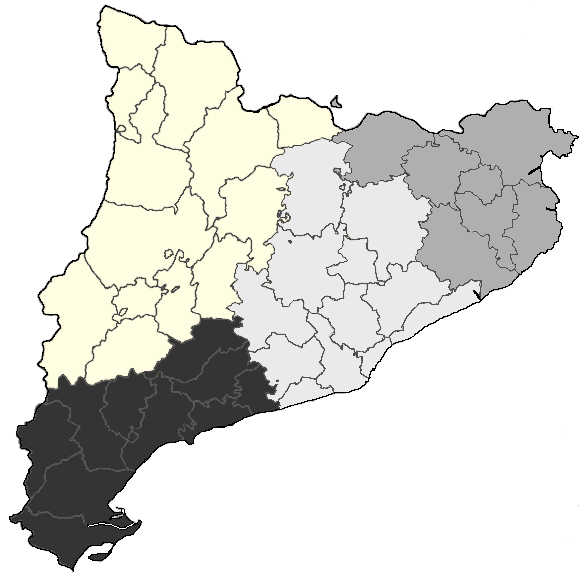


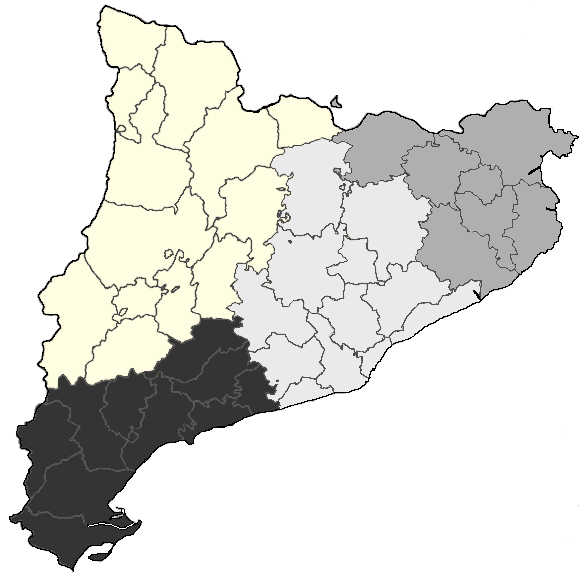


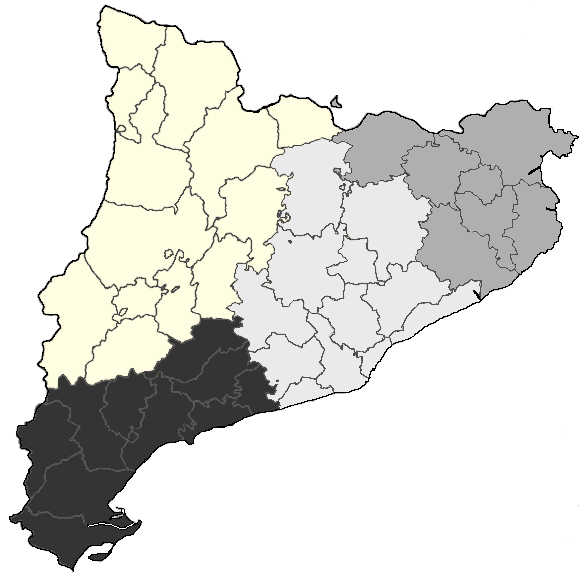


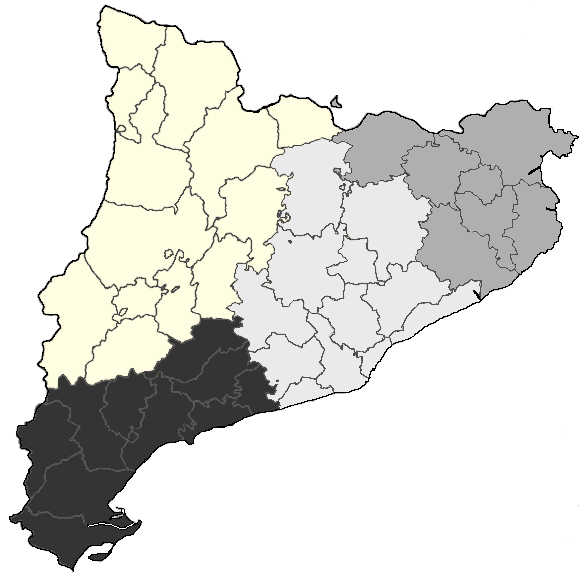

In [11]:
for col,txt in aux_text_red.items():
    fig = pu.plot_map_comarca_points(by_comarca_covid,cat,col,'normal',txt,
                                     txt.replace('en ','').replace('de ', '').title(),save=False)
    pu.add_trace_plot(fig,by_comarca_gen,col,'normal',txt,
                      '#022d63',series_name='Venda de proximitat')
    #name = config['input_path'] + "/out/" + "comparacio_vdp+covid_map_"+col+".html"
    #fig.write_html(name)
    
    fig.show()

## Nous projectes

En el cas dels projectes sortits per la crisi del COVID-19 s'ha disposat de dades de les quals els associats a venda de proximitat no tenen i que també són interessants. Hem pogut analitzar els projectes amb productes ecològics i amb enviament per comarca.

Les conclusions que es poden treure és que a la provincia del Barcelonès hi ha més projectes amb productes ecològics i les regions fora del Barcelonès són les que tenen més projectes amb enviament (podria ser que necessitin vendre al Barcelonès perquè hi ha més vendes però no disposem de les dades necessàries per comprovar-ho)

Map saved to: output/Ecos.pdf



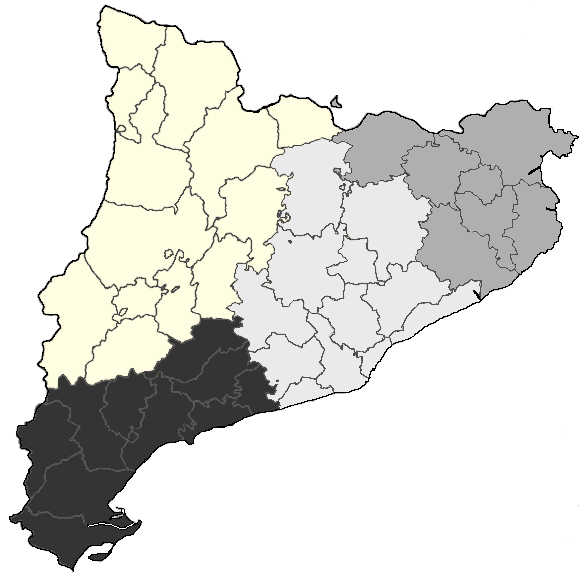

Map saved to: output/Comarques_Amb_Enviament.pdf



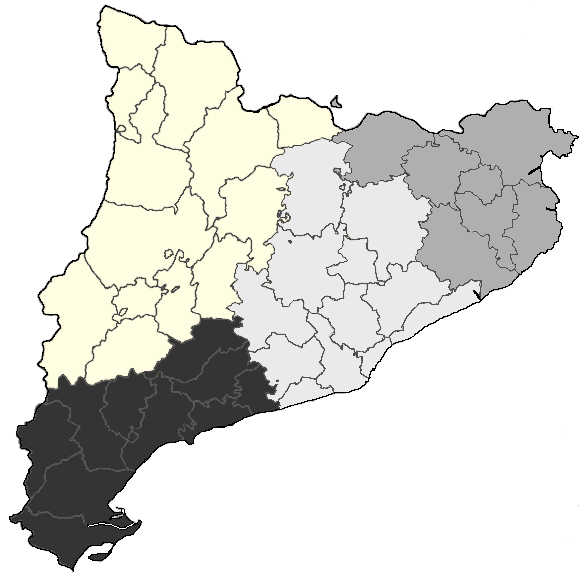

In [12]:
# plot n not percentages
dic = {'iseco':'ecos',
       'n_comarcas_delivery':'comarques amb enviament'}
for col,txt in dic.items():
    fig = pu.plot_map_comarca_points(by_comarca_covid,cat,col,'normal',txt,
                                     txt.replace('en ','').replace('de ', '').title(),save=True)
    #name = config['input_path'] + "/out/" + "abastiment+pagesos_map_"+col+".html"
    #fig.write_html(name)
    fig.show()

### Connexions logístiques

No només és interessant saber quin tipus de producte es ven a cada comarca o quants projectes hi ha, també pot interessar veure quin és el moviment de productes entre comarques. A continuació es mostren unes representacioncs per veure des de quines comarques s'envia a quines altres.

La manera per entendre aquestes representacions és la següent:
- A l'esquerra es troba la llista de les comarques d'origen.
- A la dreta es troba la llista de les comarques a on s'envia.
- Si entre una comarca de l'esquerra i una comarca de la dreta existeix una línia, és perquè existeix algun projecte en la comarca de l'esquerra que té disponible l'enviament dels seus productes a la comarca de la dreta.
- L'amplitud d'una comarca va directament relacionada amb el número de projectes de la mateixa. Així doncs, les comarques amb més projectes tenen una amplitud major.
- La foscor del color de les línies està directament relacionat amb el número de projectes amb l'enviament que la línia determina. Així doncs, si entre dues comarques hi ha una línia més fosca, és perquè hi ha un major número de projectes que compleixen la relació marcada per la línia respecte a les línies més clares.

Cal tenir en compte que a les representacions també s'hi mostra la relació de l'enviament dins la mateixa comarca.

In [13]:
pu.plot_sankey_sector(data_covid, com_coord, save=True)
pu.display_sankey_svg()

SankeyWidget(groups=[{'id': 'Comarcas_productoras', 'type': 'process', 'title': '', 'nodes': ['Comarcas_produc…

SankeyWidget(groups=[{'id': 'Comarcas_productoras', 'type': 'process', 'title': '', 'nodes': ['Comarcas_produc…

SankeyWidget(groups=[{'id': 'Comarcas_productoras', 'type': 'process', 'title': '', 'nodes': ['Comarcas_produc…

SankeyWidget(groups=[{'id': 'Comarcas_productoras', 'type': 'process', 'title': '', 'nodes': ["Comarcas_produc…

SankeyWidget(groups=[{'id': 'Comarcas_productoras', 'type': 'process', 'title': '', 'nodes': ['Comarcas_produc…

SankeyWidget(groups=[{'id': 'Comarcas_productoras', 'type': 'process', 'title': '', 'nodes': ["Comarcas_produc…

SankeyWidget(groups=[{'id': 'Comarcas_productoras', 'type': 'process', 'title': '', 'nodes': ['Comarcas_produc…

SankeyWidget(groups=[{'id': 'Comarcas_productoras', 'type': 'process', 'title': '', 'nodes': ['Comarcas_produc…

SankeyWidget(groups=[{'id': 'Comarcas_productoras', 'type': 'process', 'title': '', 'nodes': ['Comarcas_produc…

SankeyWidget(groups=[{'id': 'Comarcas_productoras', 'type': 'process', 'title': '', 'nodes': ['Comarcas_produc…

### Comparació entre els diferents projectes nous

In [14]:
aux_text = {'n_tot_prod':'Mitja productes totals',
           'n_other_prod':'Mitja productes no principals',
           'n_main_prod':'Mitja productes principals',
            'n_paym_methods':'Mitja métodes de pagament'}
for col,txt in aux_text.items():
    fig = pu.bar_perc_separate_datasets(data_covid, col, txt)
    #name = paths['output'] + "/out/" + "abastiment+pagesos_bar_"+col+".html"
    #fig.write_html(name)
    fig.show()

In [15]:
pagament = {
    'targeta':'Targeta',
    'efectiu':'Efectiu',
    'bizum':'Bizum',
    'transferencia previa':'Tranferència',
    'card+cash': 'Efectiu + targeta',
    'trans+cash': 'Efectiu + tranferència',
    'card+trans': 'Transferència + targeta',
    'card+bizum': 'Targeta + Bizum',
    'cash+bizum': 'Efectiu + Bizum',
    'trans+bizum':'Tranferència + Bizum'
}

In [16]:
ab_gb,pag_gb = pu.pagament_prep(data_covid,pagament)
fig = pu.bar_payment_type(pag_gb,ab_gb)
fig.show()

/Users/work/.virtualenvs/dadess/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
!jupyter nbconvert analysis.ipynb --to html --no-input

[NbConvertApp] Converting notebook analysis.ipynb to html
[NbConvertApp] Writing 7218519 bytes to analysis.html
